In [1]:
%load_ext autoreload
%autoreload 2

In [3]:

from pyscisci.datasource.WOS import WOS
from pyscisci.utils import groupby_count

import numpy as np
import matplotlib.pylab as plt
try:
    import seaborn as sns
    sns.set_style('white')
except:
    pass

%matplotlib inline

In [8]:
# set this path to where the WOS database will be stored
path2wos = '/home/ajgates/WOS'
path2wos = '/Volumes/GatesExpansionDrive/DataSets/WOS/'

In [9]:
mywos = WOS(path2wos, keep_in_memory=False) 
# set keep_in_memory=False if you want to load the database each time its needed - good for when you 
# cant keep more than one database in memory at a time
# otherwise keep_in_memory=True will keep each database in memory after its loaded

In [72]:
# before we can start running our analysis, we have to preprocess the raw data into
# DataFrames that are more convinent to work with

# we only need to run this for the first time, but it will take awhile
mywos.preprocess(show_progress=True)

Starting to preprocess the WOS database.


WR_1990_20170203082651_DSSU_0001.xml.gz Xml tree parsed, iterating through elements.
{'PublicationId': 'A1990DU48500003', 'Title': 'COMPARATIVE REVIEW OF SOURCES, METHODOLOGY AND KNOWLEDGE', 'Year': 1990, 'Volume': 31, 'Issue': 3, 'Pages': '229-236', 'JournalId': 'SOCIAL SCIENCE & MEDICINE', 'TeamSize': 1, 'Date': '1990-01-01', 'DocType': 'Article', 'ISSN': '0277-9536', 'DOI': ''}
[]
{'A1990DU48500003': 1990}



NameError: name 'asdgasdg' is not defined

In [ ]:
# MAG contains the following dataframes:

# pub_df - keeps all of the publication information
# columns : ['PublicationId', 'Year', 'JournalId', 'FamilyId',  'Doi', 'Title', 'Date', 'Volume', 'Issue', 'DocType']

# author_df - keeps all of the author information
# columns : ['AuthorId', 'FullName', 'LastName', 'FirstName', 'MiddleName']

# pub2ref_df - links publications to their references or citations
# columns : ['CitingPublicationId', 'CitedPublicationId']

# paa_df - links publications, authors, and affiliations
# columns : ['PublicationId', 'AuthorId', 'AffiliationId', 'AuthorSequence',  'OrigAuthorName', 'OrigAffiliationName']

# author2pub_df - links the authors to their publications
# columns : ['PublicationId', 'AuthorId', 'AuthorOrder']

# field_df - field information
# columns : ['FieldId', 'FieldLevel', 'NumberPublications', 'FieldName']

# pub2field_df - links publications to their fields
# columns : ['PublicationId', 'FieldId']

# affiliation_df - affiliation information
# columns : ['AffiliationId', 'NumberPublications', 'NumberCitations', 'FullName', 'GridId', 'OfficialPage', 'WikiPage', 'Latitude', 'Longitude']

# journal_df - journal information
# columns : ['JournalId', 'FullName', 'Issn', 'Publisher', 'Webpage']


# after additional processing, these DataFrames become available

# pub2refnoself_df - links publications to their references or citations with self-citations removed
# columns : ['CitingPublicationId', 'CitedPublicationId']

# impact_df - precomputed citation counts, columns will depend on which counts are computed
# columns : ['PublicationId', 'Year', ....]

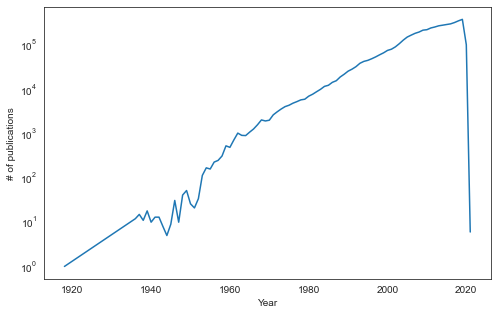

In [4]:
# lets plot the number of publications each year
yearly_articles = groupby_count(df=mymag.pub_df, colgroupby='Year', colcountby='PublicationId', unique=True)
yearly_articles.sort_values(by='Year', inplace=True)
yearly_articles = yearly_articles.loc[yearly_articles['Year'] > 0]

fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(yearly_articles['Year'],yearly_articles['PublicationIdCount'])

ax.set_xlabel('Year')
ax.set_ylabel("# of publications")
ax.set_yscale('log')

plt.show()

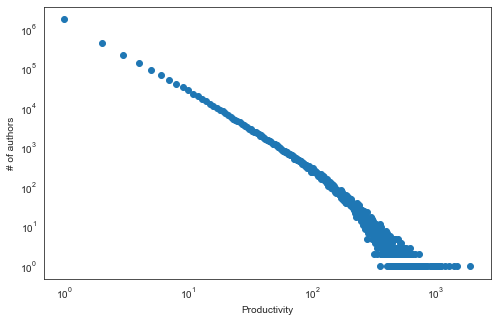

In [5]:
# now we can see the distribution of author productivity 
author_prod = mymag.author_productivity()

prodvalues, prodcounts = np.unique(author_prod['Productivity'].values, return_counts=True)

fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.scatter(prodvalues, prodcounts)

ax.set_xlabel('Productivity')
ax.set_ylabel("# of authors")
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()